<a href="https://colab.research.google.com/github/justingardner/tutorials/blob/master/recurrence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm import tqdm as progressBar
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from IPython import display
from functools import partial
from numpy.linalg import eig

In [164]:
!pip install -Uqq ipdb
import ipdb

In [161]:
%pdb off

Automatic pdb calling has been turned OFF


100%|██████████| 9999/9999 [00:00<00:00, 18848.85it/s]


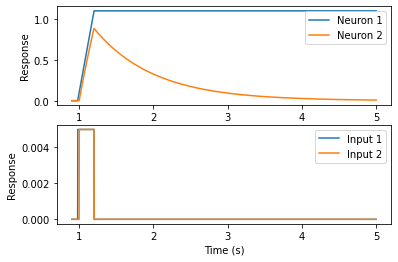

In [151]:
# number of seconds to simulate for
simulationLength = 10;

# Number of time points per second
sampleRate = 1000;

# some constants calculated from the above parameters
dt = 1/sampleRate;
nTimePoints = int(simulationLength * sampleRate);

#theta = 3;
#W = np.matrix([[1-np.cos(theta), -np.sin(theta)],[1-np.sin(theta),np.cos(theta)]])
x0 = np.matrix([0, 0]).transpose()
#ws = 0.01
#w = 0.99975-ws
tau = .005;
tau = np.inf;
tau = 0.8;
#tau = np.inf;
#W = (-1/tau) * np.matrix([[(1+ws), w],[w,(1+ws)]])
W = np.matrix([[-(1/tau), 0],[0,-(1/tau)]]);
#W = np.matrix([[-(1/tau), 0],[0,-(1/tau)]]) * np.matrix([[1, -1],[-1,1]])
#W = np.matrix([[-200, -30],[-30,-200]])
#W = np.matrix([[0, -1],[1,0]])
W = np.matrix([[-1/np.inf, 0],[0,-1/tau]])
#W = np.matrix([[-1/tau, 0],[0,-1/(100*tau)]])
#W = np.matrix([[0.7, 0.3],[0.3,0.7]])
#W = np.matrix([[-0.001, -0.001],[-0.001,-0.001]])
#W = np.matrix([[1, 0],[0, 0]]);
#W = np.matrix([[-1/tau, 1.3],[1.3,-1/tau]])
#W = np.matrix([[-1/tau, -10.2],[-10.2,-1/tau]])
#W = np.matrix([[-1/tau, -1.25],[-1.25,-1/tau]])

# define inputs
u = np.matrix(np.zeros((2,nTimePoints)));
pulseLen = 0.2;
u[:,int(1*sampleRate):int((1+pulseLen)*sampleRate)] = 1/int(sampleRate*pulseLen)
u[0,int(0.98*sampleRate):int((1)*sampleRate)] = 1/int(sampleRate*pulseLen)
t = np.array(range(0,nTimePoints))/sampleRate;

# initialize array that will hold each state of the model
nTimePoints = int(simulationLength*sampleRate)
x = np.matrix(np.zeros((2,nTimePoints)))
x[:,0] = x0;

for iTimePoint in progressBar(range(1,nTimePoints)):
  dx = W @ x[:,iTimePoint-1] * dt
  x[:,iTimePoint] = x[:,iTimePoint-1] + dx + u[:,iTimePoint];
  #print('x[%i]: %f %f dx/dt: %f %f'%(iFrame,x[iFrame,0],x[iFrame,1],dx[0,0],dx[0,1]))

# dress up figure
#plt.plot(x[0,:],x[1,:],'k.');
#plotRange= 2;
#plt.xlim(-plotRange,plotRange);plt.ylim(-plotRange,plotRange);
#plt.axvline(linestyle=':',color='k');plt.axhline(linestyle=':',color='k');
#plt.xlabel('Neuron 1 activity');plt.ylabel('Neuron 2 activity');
plt.figure();
startTime = 0.9; endTime = 5;
plt.subplot(2,1,1)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],x[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
#plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],u[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Neuron 1','Neuron 2'))
plt.subplot(2,1,2)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],u[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Input 1','Input 2'))


100%|██████████| 9999/9999 [00:00<00:00, 16959.47it/s]


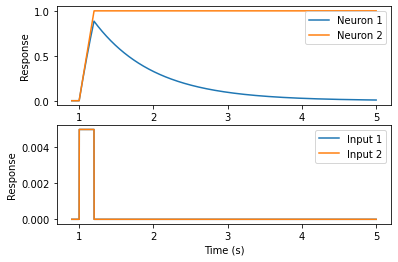

In [160]:
# number of seconds to simulate for
simulationLength = 10;

# Number of time points per second
sampleRate = 1000;

# some constants calculated from the above parameters
dt = 1/sampleRate;
nTimePoints = int(simulationLength * sampleRate);

#theta = 3;
#W = np.matrix([[1-np.cos(theta), -np.sin(theta)],[1-np.sin(theta),np.cos(theta)]])
x0 = np.matrix([0, 0]).transpose()
#ws = 0.01
#w = 0.99975-ws
tau = .005;
tau = np.inf;
tau = 0.8;
#tau = np.inf;
#W = (-1/tau) * np.matrix([[(1+ws), w],[w,(1+ws)]])
W = np.matrix([[-(1/tau), 0],[0,-(1/tau)]]);
#W = np.matrix([[-(1/tau), 0],[0,-(1/tau)]]) * np.matrix([[1, -1],[-1,1]])
#W = np.matrix([[-200, -30],[-30,-200]])
#W = np.matrix([[0, -1],[1,0]])
#W = np.matrix([[-1/tau, 1.25],[1.25,-1/tau]])
W = np.matrix([[-1/tau, 0],[0,-1/np.inf]])
#W = np.matrix([[-1/tau, 0],[0,-1/(100*tau)]])
#W = np.matrix([[0.7, 0.3],[0.3,0.7]])
#W = np.matrix([[-0.001, -0.001],[-0.001,-0.001]])
#W = np.matrix([[1, 0],[0, 0]]);
#W = np.matrix([[-1/tau, 1.3],[1.3,-1/tau]])
#W = np.matrix([[-1/tau, -10.2],[-10.2,-1/tau]])
#W = np.matrix([[-1/tau, -1.25],[-1.25,-1/tau]])

# define inputs
u = np.matrix(np.zeros((2,nTimePoints)));
pulseLen = 0.2;
u[:,int(1*sampleRate):int((1+pulseLen)*sampleRate)] = 1/int(sampleRate*pulseLen)
#u[0,int(0.98*sampleRate):int((1)*sampleRate)] = 1/int(sampleRate*pulseLen)
t = np.array(range(0,nTimePoints))/sampleRate;

# initialize array that will hold each state of the model
nTimePoints = int(simulationLength*sampleRate)
x = np.matrix(np.zeros((2,nTimePoints)))
x[:,0] = x0;

for iTimePoint in progressBar(range(1,nTimePoints)):
  dx = W @ x[:,iTimePoint-1] * dt
  x[:,iTimePoint] = x[:,iTimePoint-1] + dx + u[:,iTimePoint];
  #print('x[%i]: %f %f dx/dt: %f %f'%(iFrame,x[iFrame,0],x[iFrame,1],dx[0,0],dx[0,1]))

# dress up figure
#plt.plot(x[0,:],x[1,:],'k.');
#plotRange= 2;
#plt.xlim(-plotRange,plotRange);plt.ylim(-plotRange,plotRange);
#plt.axvline(linestyle=':',color='k');plt.axhline(linestyle=':',color='k');
#plt.xlabel('Neuron 1 activity');plt.ylabel('Neuron 2 activity');
plt.figure();
startTime = 0.9; endTime = 5;
plt.subplot(2,1,1)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],x[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
#plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],u[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Neuron 1','Neuron 2'))
plt.subplot(2,1,2)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],u[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Input 1','Input 2'))


In [ ]:
frameRate = 30;
fig, ax = plt.subplots()

def drawModel(iStep):
  # display
  plt.clf();

#anim = FuncAnimation(fig, stepModel, frames=nFrames, interval=frameRate)
plt.show;
#HTML(anim.to_html5_video())

In [30]:
w,v=eig(W)
print('eigenvalue:', w)
print('|eignvalue|:', np.abs(w))
print('|1/eignvalue|:', np.abs(1/w))
print('1/eignvalue:', -1/w)
print('eigenvector:', v)

eigenvalue: [ 2.22044605e-16 -2.50000000e+00]
|eignvalue|: [2.22044605e-16 2.50000000e+00]
|1/eignvalue|: [4.50359963e+15 4.00000000e-01]
1/eignvalue: [-4.50359963e+15  4.00000000e-01]
eigenvector: [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


100%|██████████| 19999/19999 [00:01<00:00, 14201.66it/s]


eigenvalue: [ -2.6+69.70466268j  -2.6-69.70466268j -47.6+51.16385443j
 -47.6-51.16385443j]


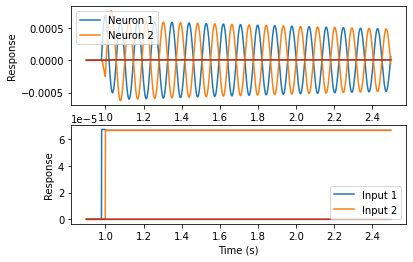

In [95]:
# number of seconds to simulate for
simulationLength = 20;

# Number of time points per second
sampleRate = 1000;

# some constants calculated from the above parameters
dt = 1/sampleRate;
nTimePoints = int(simulationLength * sampleRate);

#theta = 3;
#W = np.matrix([[1-np.cos(theta), -np.sin(theta)],[1-np.sin(theta),np.cos(theta)]])
x0 = np.matrix([0, 0, 0, 0]).transpose()
#ws = 0.01
#w = 0.99975-ws
tau = 0.020;
tauH = 5;
h = 0.47;
g = 45;
hAdapt = g*230;
W = np.matrix([[-1/tau, -g, -hAdapt, 0],[-g,-1/tau, 0, -hAdapt],[h,0,-1/tauH, 0],[0,h,0,-1/tauH]])

# define inputs
u = np.matrix(np.zeros((4,nTimePoints)));
pulseLen = 15;
u[0,int(1*sampleRate):int((1+pulseLen)*sampleRate)] = 1/int(sampleRate*pulseLen)
u[1,int(1*sampleRate):int((1+pulseLen)*sampleRate)] = 1/int(sampleRate*pulseLen)
u[0,int(0.98*sampleRate):int((1)*sampleRate)] = 1.01/int(sampleRate*pulseLen)
#u[1,int(0.98*sampleRate):int((1)*sampleRate)] = 0.75/int(sampleRate*pulseLen)
t = np.array(range(0,nTimePoints))/sampleRate;

# initialize array that will hold each state of the model
nTimePoints = int(simulationLength*sampleRate)
x = np.matrix(np.zeros((4,nTimePoints)))
x[:,0] = x0;

for iTimePoint in progressBar(range(1,nTimePoints)):
  dx = W @ x[:,iTimePoint-1] * dt
  x[:,iTimePoint] = x[:,iTimePoint-1] + dx + u[:,iTimePoint];
  #print('x[%i]: %f %f dx/dt: %f %f'%(iFrame,x[iFrame,0],x[iFrame,1],dx[0,0],dx[0,1]))

# dress up figure
#plt.plot(x[0,:],x[1,:],'k.');
#plotRange= 2;
#plt.xlim(-plotRange,plotRange);plt.ylim(-plotRange,plotRange);
#plt.axvline(linestyle=':',color='k');plt.axhline(linestyle=':',color='k');
#plt.xlabel('Neuron 1 activity');plt.ylabel('Neuron 2 activity');
plt.figure();
startTime = 0.9; endTime = 2.5;
plt.subplot(2,1,1)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],x[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
#plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],u[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Neuron 1','Neuron 2'))
plt.subplot(2,1,2)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],u[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Input 1','Input 2'))

w,v=eig(W);
print('eigenvalue:', w);



In [ ]:
# number of seconds to simulate for
simulationLength = 20;

# Number of time points per second
sampleRate = 1000;

# some constants calculated from the above parameters
dt = 1/sampleRate;
nTimePoints = int(simulationLength * sampleRate);

#theta = 3;
#W = np.matrix([[1-np.cos(theta), -np.sin(theta)],[1-np.sin(theta),np.cos(theta)]])
x0 = np.matrix([0, 0, 0, 0]).transpose()
#ws = 0.01
#w = 0.99975-ws
tau = 0.020;
tauH = 5;
h = 0.47;
g = 45;
hAdapt = g*230;
W = np.matrix([[-1/tau, -g, -hAdapt, 0],[-g,-1/tau, 0, -hAdapt],[h,0,-1/tauH, 0],[0,h,0,-1/tauH]])

# define inputs
u = np.matrix(np.zeros((4,nTimePoints)));
pulseLen = 15;
u[0,int(1*sampleRate):int((1+pulseLen)*sampleRate)] = 1/int(sampleRate*pulseLen)
u[1,int(1*sampleRate):int((1+pulseLen)*sampleRate)] = 1/int(sampleRate*pulseLen)
u[0,int(0.98*sampleRate):int((1)*sampleRate)] = 1.01/int(sampleRate*pulseLen)
#u[1,int(0.98*sampleRate):int((1)*sampleRate)] = 0.75/int(sampleRate*pulseLen)
t = np.array(range(0,nTimePoints))/sampleRate;

# initialize array that will hold each state of the model
nTimePoints = int(simulationLength*sampleRate)
x = np.matrix(np.zeros((4,nTimePoints)))
x[:,0] = x0;

for iTimePoint in progressBar(range(1,nTimePoints)):
  dx = W @ x[:,iTimePoint-1] * dt
  x[:,iTimePoint] = x[:,iTimePoint-1] + dx + u[:,iTimePoint];
  #print('x[%i]: %f %f dx/dt: %f %f'%(iFrame,x[iFrame,0],x[iFrame,1],dx[0,0],dx[0,1]))

# dress up figure
#plt.plot(x[0,:],x[1,:],'k.');
#plotRange= 2;
#plt.xlim(-plotRange,plotRange);plt.ylim(-plotRange,plotRange);
#plt.axvline(linestyle=':',color='k');plt.axhline(linestyle=':',color='k');
#plt.xlabel('Neuron 1 activity');plt.ylabel('Neuron 2 activity');
plt.figure();
startTime = 0.9; endTime = 2.5;
plt.subplot(2,1,1)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],x[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
#plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],u[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Neuron 1','Neuron 2'))
plt.subplot(2,1,2)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],u[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Input 1','Input 2'))

w,v=eig(W);
print('eigenvalue:', w);



100%|██████████| 19999/19999 [00:01<00:00, 14875.39it/s]


eigenvalue: [ -90.90909091 -111.11111111  -50.         -111.11111111  -90.90909091
  -50.        ]


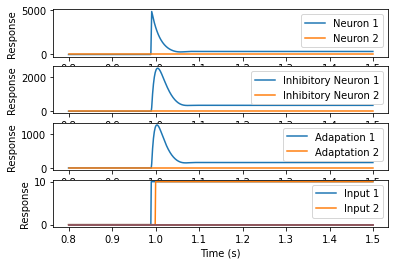

In [150]:
# number of seconds to simulate for
simulationLength = 20;

# Number of time points per second
sampleRate = 1000;

# some constants calculated from the above parameters
dt = 1/sampleRate;
nTimePoints = int(simulationLength * sampleRate);

x0 = np.matrix([0, 0, 0, 0, 0, 0]).transpose()
tau = 0.020;
tauI = 0.011;
tauH = 0.009;
h = 0.47;
g = 45;
W = np.matrix([[-1/tau,0,0,0,0,0],[0,-1/tau,0,0,0,0],[1/tauI,0,-1/tauI,0,0,0],[0,1/tauI,0,-1/tauI,0,0],[h/tauH,0,0,0,-1/tauH,0],[0,h/tauH,0,0,0,-1/tauH]])

# define inputs
u = np.matrix(np.zeros((6,nTimePoints)));
pulseLen = 15;
u[0,int(1*sampleRate):int((1+pulseLen)*sampleRate)] = 10;
u[1,int(1*sampleRate):int((1+pulseLen)*sampleRate)] = 10;
u[0,int(0.99*sampleRate):int((1)*sampleRate)] = 10;
t = np.array(range(0,nTimePoints))/sampleRate;

# initialize array that will hold each state of the model
nTimePoints = int(simulationLength*sampleRate)
x = np.matrix(np.zeros((6,nTimePoints)))
x[:,0] = x0;

for iTimePoint in progressBar(range(1,nTimePoints)):
  # update linear part
  dx = W @ x[:,iTimePoint-1] * dt
  x[:,iTimePoint] = x[:,iTimePoint-1] + dx;
  # update non-linear part, first get input
  # as difference between input and inhibition
  leftInput = u[0,iTimePoint] - g*x[3,iTimePoint-1]
  rightInput = u[1,iTimePoint] - g*x[2,iTimePoint-1]
  # threshold and square
  leftInput = np.multiply((leftInput>0),leftInput)**2
  rightInput = np.multiply((rightInput>0),rightInput)**2
  # now calculate naka-rushton
  leftNakaRushton = 100*leftInput / ((10 + x[4,iTimePoint-1])**2 + leftInput);
  rightNakaRushton = 100*rightInput / ((10 + x[5,iTimePoint-1])**2 + rightInput);
  # and add to Ev / Eh
  x[0,iTimePoint] += leftNakaRushton/tau;
  x[1,iTimePoint] += rightNakaRushton/tau;

# dress up figure
plt.figure();
startTime = 0.8; endTime = 1.5;
plt.subplot(4,1,1)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],x[0:2,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
#plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],u[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Neuron 1','Neuron 2'))
plt.subplot(4,1,2)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],x[2:4,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
#plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],u[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Inhibitory Neuron 1','Inhibitory Neuron 2'))
plt.subplot(4,1,3)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],x[4:6,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
#plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],u[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Adapation 1','Adaptation 2'))
plt.subplot(4,1,4)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],u[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Input 1','Input 2'))

w,v=eig(W);
print('eigenvalue:', w);



In [141]:
x = np.matrix([[1,3],[2,4]])
np.multiply((x>2),x)**2
print(x[:,:])

[[1 3]
 [2 4]]


100%|██████████| 19999/19999 [00:02<00:00, 7276.73it/s]


eigenvalue: [-90.90909091 -11.11111111 -50.         -11.11111111 -90.90909091
 -50.        ]


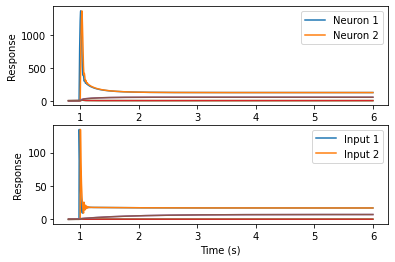

In [113]:
# number of seconds to simulate for
simulationLength = 20;

# Number of time points per second
sampleRate = 1000;

# some constants calculated from the above parameters
dt = 1/sampleRate;
nTimePoints = int(simulationLength * sampleRate);

x0 = np.matrix([0, 0, 0, 0, 0, 0]).transpose()
tau = 0.020;
tauI = 0.011;
tauH = 0.9;
h = 0.47;
g = 45;
gHigh = 0.75;
WMono = np.matrix([[-1/tau,0,0,0,0,0],[0,-1/tau,0,0,0,0],[1,0,-1/tauI,0,0,0],[0,1,0,-1/tauI,0,0],[h,0,0,0,-1/tauH,0],[0,h,0,0,0,-1/tauH]])
WBino = np.matrix([[-1/tau,0,0,0,0,0],[0,-1/tau,0,0,0,0],[1,0,-1/tauI,0,0,0],[0,1,0,-1/tauI,0,0],[h,0,0,0,-1/tauH,0],[0,h,0,0,0,-1/tauH]])

# define inputs
u = np.matrix(np.zeros((6,nTimePoints)));
pulseLen = 15;
u[0,int(1*sampleRate):int((1+pulseLen)*sampleRate)] = 10;
u[1,int(1*sampleRate):int((1+pulseLen)*sampleRate)] = 10;
u[0,int(0.98*sampleRate):int((1)*sampleRate)] = 10;
t = np.array(range(0,nTimePoints))/sampleRate;

# initialize array that will hold each state of the model
nTimePoints = int(simulationLength*sampleRate)
xMono = np.matrix(np.zeros((6,nTimePoints)))
xBino = np.matrix(np.zeros((6,nTimePoints)))
xMono[:,0] = x0;
xBino[:,0] = x0;

for iTimePoint in progressBar(range(1,nTimePoints)):
  # update linear part of monocular layer
  dx = WMono @ xMono[:,iTimePoint-1] * dt
  xMono[:,iTimePoint] = xMono[:,iTimePoint-1] + dx;
  # update non-linear part, first get input
  # as difference between and inhibition
  leftInput = u[0,iTimePoint] - g*xMono[2,iTimePoint-1]
  rightInput = u[1,iTimePoint] - g*xMono[3,iTimePoint-1]
  # threshold and square
  leftInput = np.multiply((leftInput>0),leftInput)**2
  rightInput = np.multiply((rightInput>0),rightInput)**2
  # now calculate naka-rushton
  leftNakaRushton = 100*leftInput / ((10 + xMono[4,iTimePoint-1])**2 + leftInput);
  rightNakaRushton = 100*rightInput / ((10 + xMono[5,iTimePoint-1])**2 + rightInput);
  # and add to Ev / Eh
  xMono[0,iTimePoint] += leftNakaRushton;
  xMono[1,iTimePoint] += rightNakaRushton;
  
  # update linear part of binocular layer
  dx = WBino @ xBino[:,iTimePoint-1] * dt
  xBino[:,iTimePoint] = xBino[:,iTimePoint-1] + dx;
  # update non-linear part, first get input
  # as difference between and inhibition
  leftInput = xMono[0,iTimePoint-1] - gHigh*xBino[2,iTimePoint-1]
  rightInput = xMono[1,iTimePoint-1] - gHigh*xBino[3,iTimePoint-1]
  # threshold and square
  leftInput = np.multiply((leftInput>0),leftInput)**2
  rightInput = np.multiply((rightInput>0),rightInput)**2
  # now calculate naka-rushton
  leftNakaRushton = 100*leftInput / ((10 + xBino[4,iTimePoint-1])**2 + leftInput);
  rightNakaRushton = 100*rightInput / ((10 + xBino[5,iTimePoint-1])**2 + rightInput);
  # and add to Ev / Eh
  xBino[0,iTimePoint] += leftNakaRushton;
  xBino[1,iTimePoint] += rightNakaRushton;

# dress up figure
plt.figure();
startTime = 0.8; endTime = 6
plt.subplot(2,1,1)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],xBino[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
#plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],u[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Neuron 1','Neuron 2'))
plt.subplot(2,1,2)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],xMono[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Input 1','Input 2'))

w,v=eig(W);
print('eigenvalue:', w);

